In [3]:
import sys
import os

# Get the parent directory of current directory
parent_dir = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(parent_dir)

sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/')
# Now you can import from pyScripts
from oldmarch.cluster_g_logit_init_acceptpsi import *

%load_ext autoreload


In [4]:

%autoreload 2
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

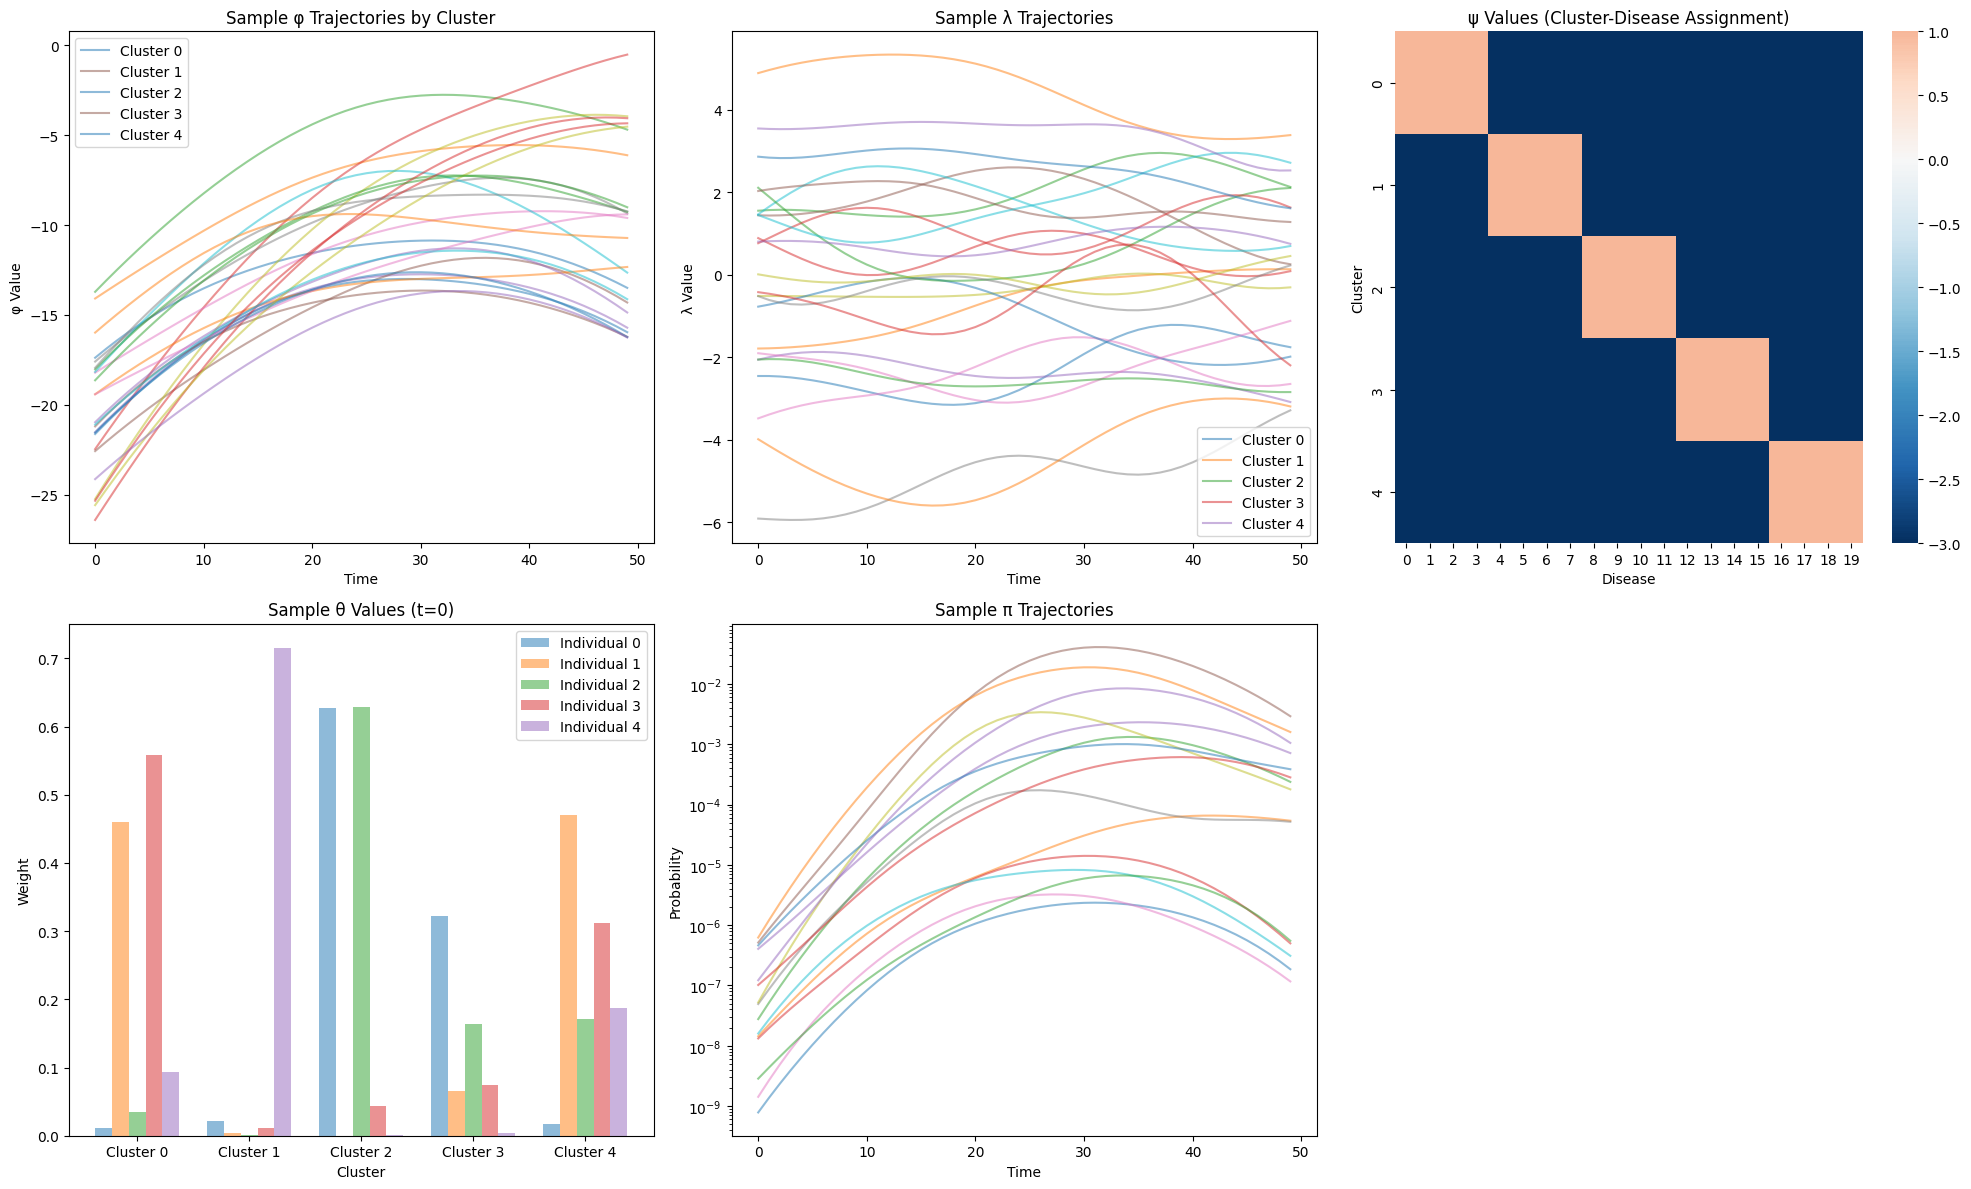

In [5]:
# Generate and plot
np.random.seed(42)
data = generate_clustered_survival_data(N=10000, D=20, T=50, K=5, P=5)
plot_synthetic_components(data)

In [6]:
# First generate synthetic data
np.random.seed(42)

# Convert data to tensors for the model
Y_tensor = torch.tensor(data['Y'], dtype=torch.float32)
G_tensor = torch.tensor(data['G'], dtype=torch.float32)
E_tensor = torch.tensor(data['event_times'], dtype=torch.float32)
true_psi = torch.tensor(data['psi'], dtype=torch.float32)


In [7]:

# Calculate prevalence_t from synthetic data
prevalence_t = compute_smoothed_prevalence(Y_tensor)  # Average over individuals

from clust_huge_amp import *

/Users/sarahurbut/aladynoulli2/pyScripts_forPublish/clust_huge_amp.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts_forPublish/clust_huge_amp.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G_scaled, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts_forPublish/clust_huge_amp.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)



Cluster Sizes:
Cluster 0: 3 diseases
Cluster 1: 8 diseases
Cluster 2: 4 diseases
Cluster 3: 3 diseases
Cluster 4: 2 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 3
Base value (first 5): tensor([ -7.1997, -10.5076, -10.5076, -10.5076,  -7.1997])
Base value centered (first 5): tensor([ 0.6275, -2.6804, -2.6804, -2.6804,  0.6275])
Base value centered mean: 3.0059814548621944e-07
Gamma init for k=0 (first 5): tensor([ 0.2781,  0.2558, -0.2568, -0.2966,  0.1783])

Calculating gamma for k=1:
Number of diseases in cluster: 8
Base value (first 5): tensor([-10.0941, -10.0941, -10.0941, -10.0941, -10.0941])
Base value centered (first 5): tensor([-0.0388, -0.0388, -0.0388, -0.0388, -0.0388])
Base value centered mean: 4.2476654016354587e-07
Gamma init for k=1 (first 5): tensor([ 0.0050, -0.0058,  0.0114,  0.0317, -0.0129])

Calculating gamma for k=2:
Number of diseases in cluster: 4
Base value (first 5): tensor([ -3.8918, -11.3346,  -3.8918,  -6.3727,  -8.8537])
Base value c

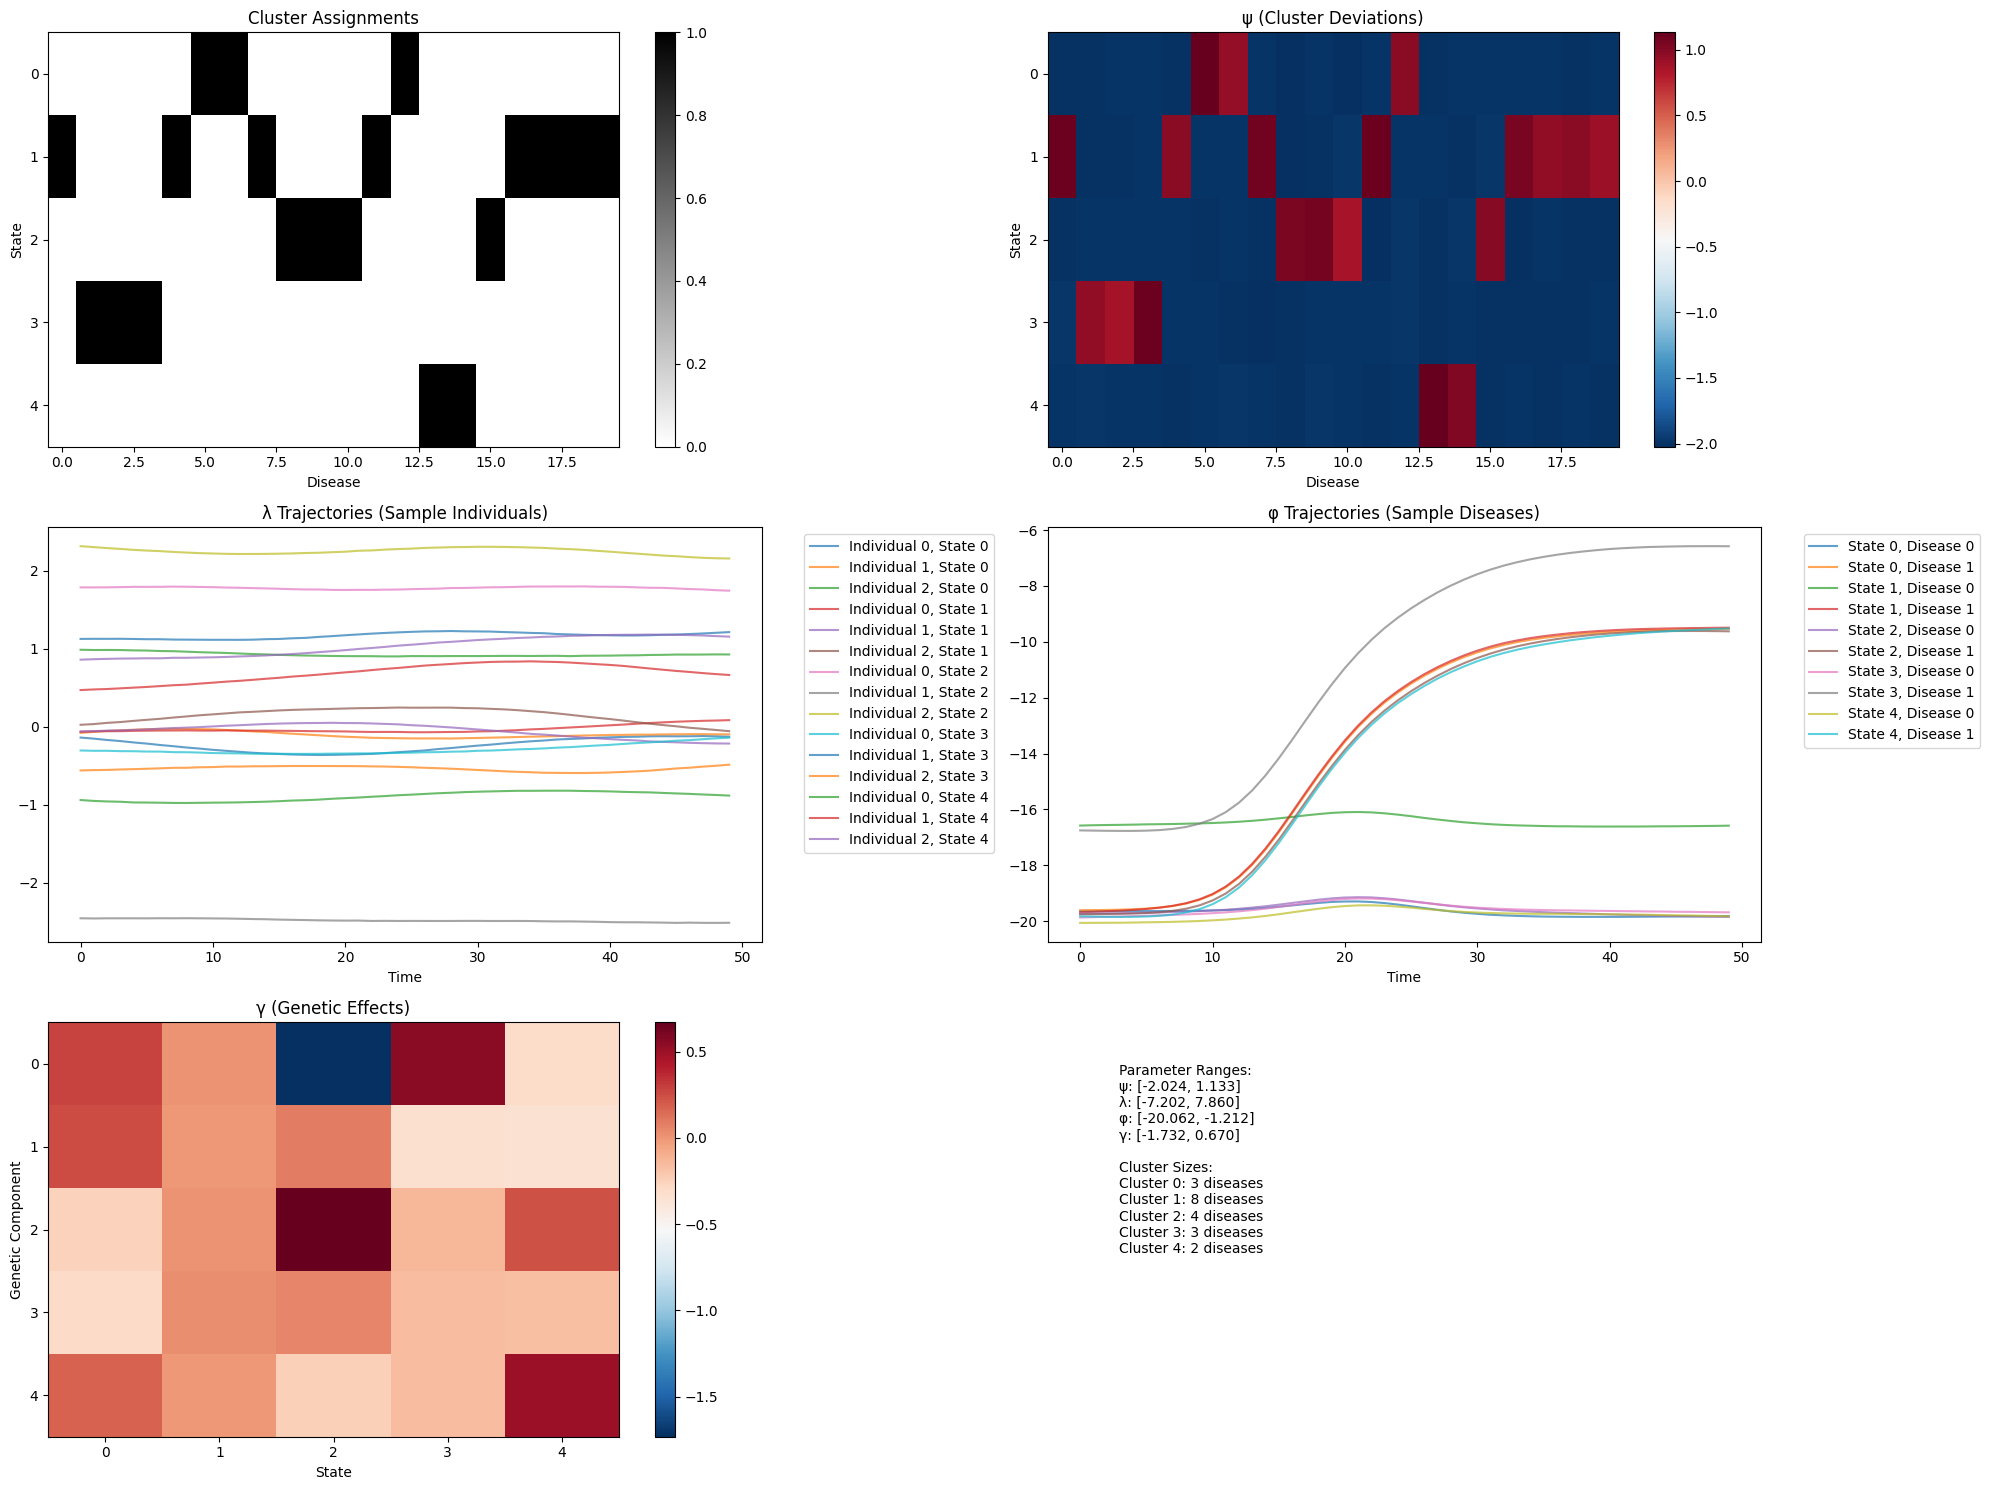

In [8]:
model_est = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=data['Y'].shape[0], 
    D=data['Y'].shape[1], 
    T=data['Y'].shape[2], 
    K=data['phi'].shape[0],  # number of clusters
    P=data['G'].shape[1],    # number of genetic features
    G=G_tensor,
    Y=Y_tensor,
    R=0,                     # Make sure R is provided
    W=1e-4,                # Make sure W is provided
    prevalence_t=prevalence_t,
    init_sd_scaler=1e-1,     # This matches your class definition
    genetic_scale=1,
    signature_references=None,
    healthy_reference=None,
    disease_names=None,
    flat_lambda=True,
    learn_kappa=True
)

model_est.visualize_initialization()


In [9]:
from analyze_clusters import *
plot_confusion_matrix(data['clusters'], model_est.clusters, K=5) 


Clustering Metrics:
Adjusted Rand Index: 0.294
Normalized Mutual Information: 0.592


array([3, 0, 2, 4, 1])

In [10]:
from clust_huge_amp import *

/Users/sarahurbut/aladynoulli2/pyScripts_forPublish/clust_huge_amp.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts_forPublish/clust_huge_amp.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G_scaled, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts_forPublish/clust_huge_amp.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)



Cluster Sizes:
Cluster 0: 3 diseases
Cluster 1: 8 diseases
Cluster 2: 4 diseases
Cluster 3: 3 diseases
Cluster 4: 2 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 3
Base value (first 5): tensor([ -7.1997, -10.5076, -10.5076, -10.5076,  -7.1997])
Base value centered (first 5): tensor([ 0.6275, -2.6804, -2.6804, -2.6804,  0.6275])
Base value centered mean: 3.0059814548621944e-07
Gamma init for k=0 (first 5): tensor([ 0.2781,  0.2558, -0.2568, -0.2966,  0.1783])

Calculating gamma for k=1:
Number of diseases in cluster: 8
Base value (first 5): tensor([-10.0941, -10.0941, -10.0941, -10.0941, -10.0941])
Base value centered (first 5): tensor([-0.0388, -0.0388, -0.0388, -0.0388, -0.0388])
Base value centered mean: 4.2476654016354587e-07
Gamma init for k=1 (first 5): tensor([ 0.0050, -0.0058,  0.0114,  0.0317, -0.0129])

Calculating gamma for k=2:
Number of diseases in cluster: 4
Base value (first 5): tensor([ -3.8918, -11.3346,  -3.8918,  -6.3727,  -8.8537])
Base value c

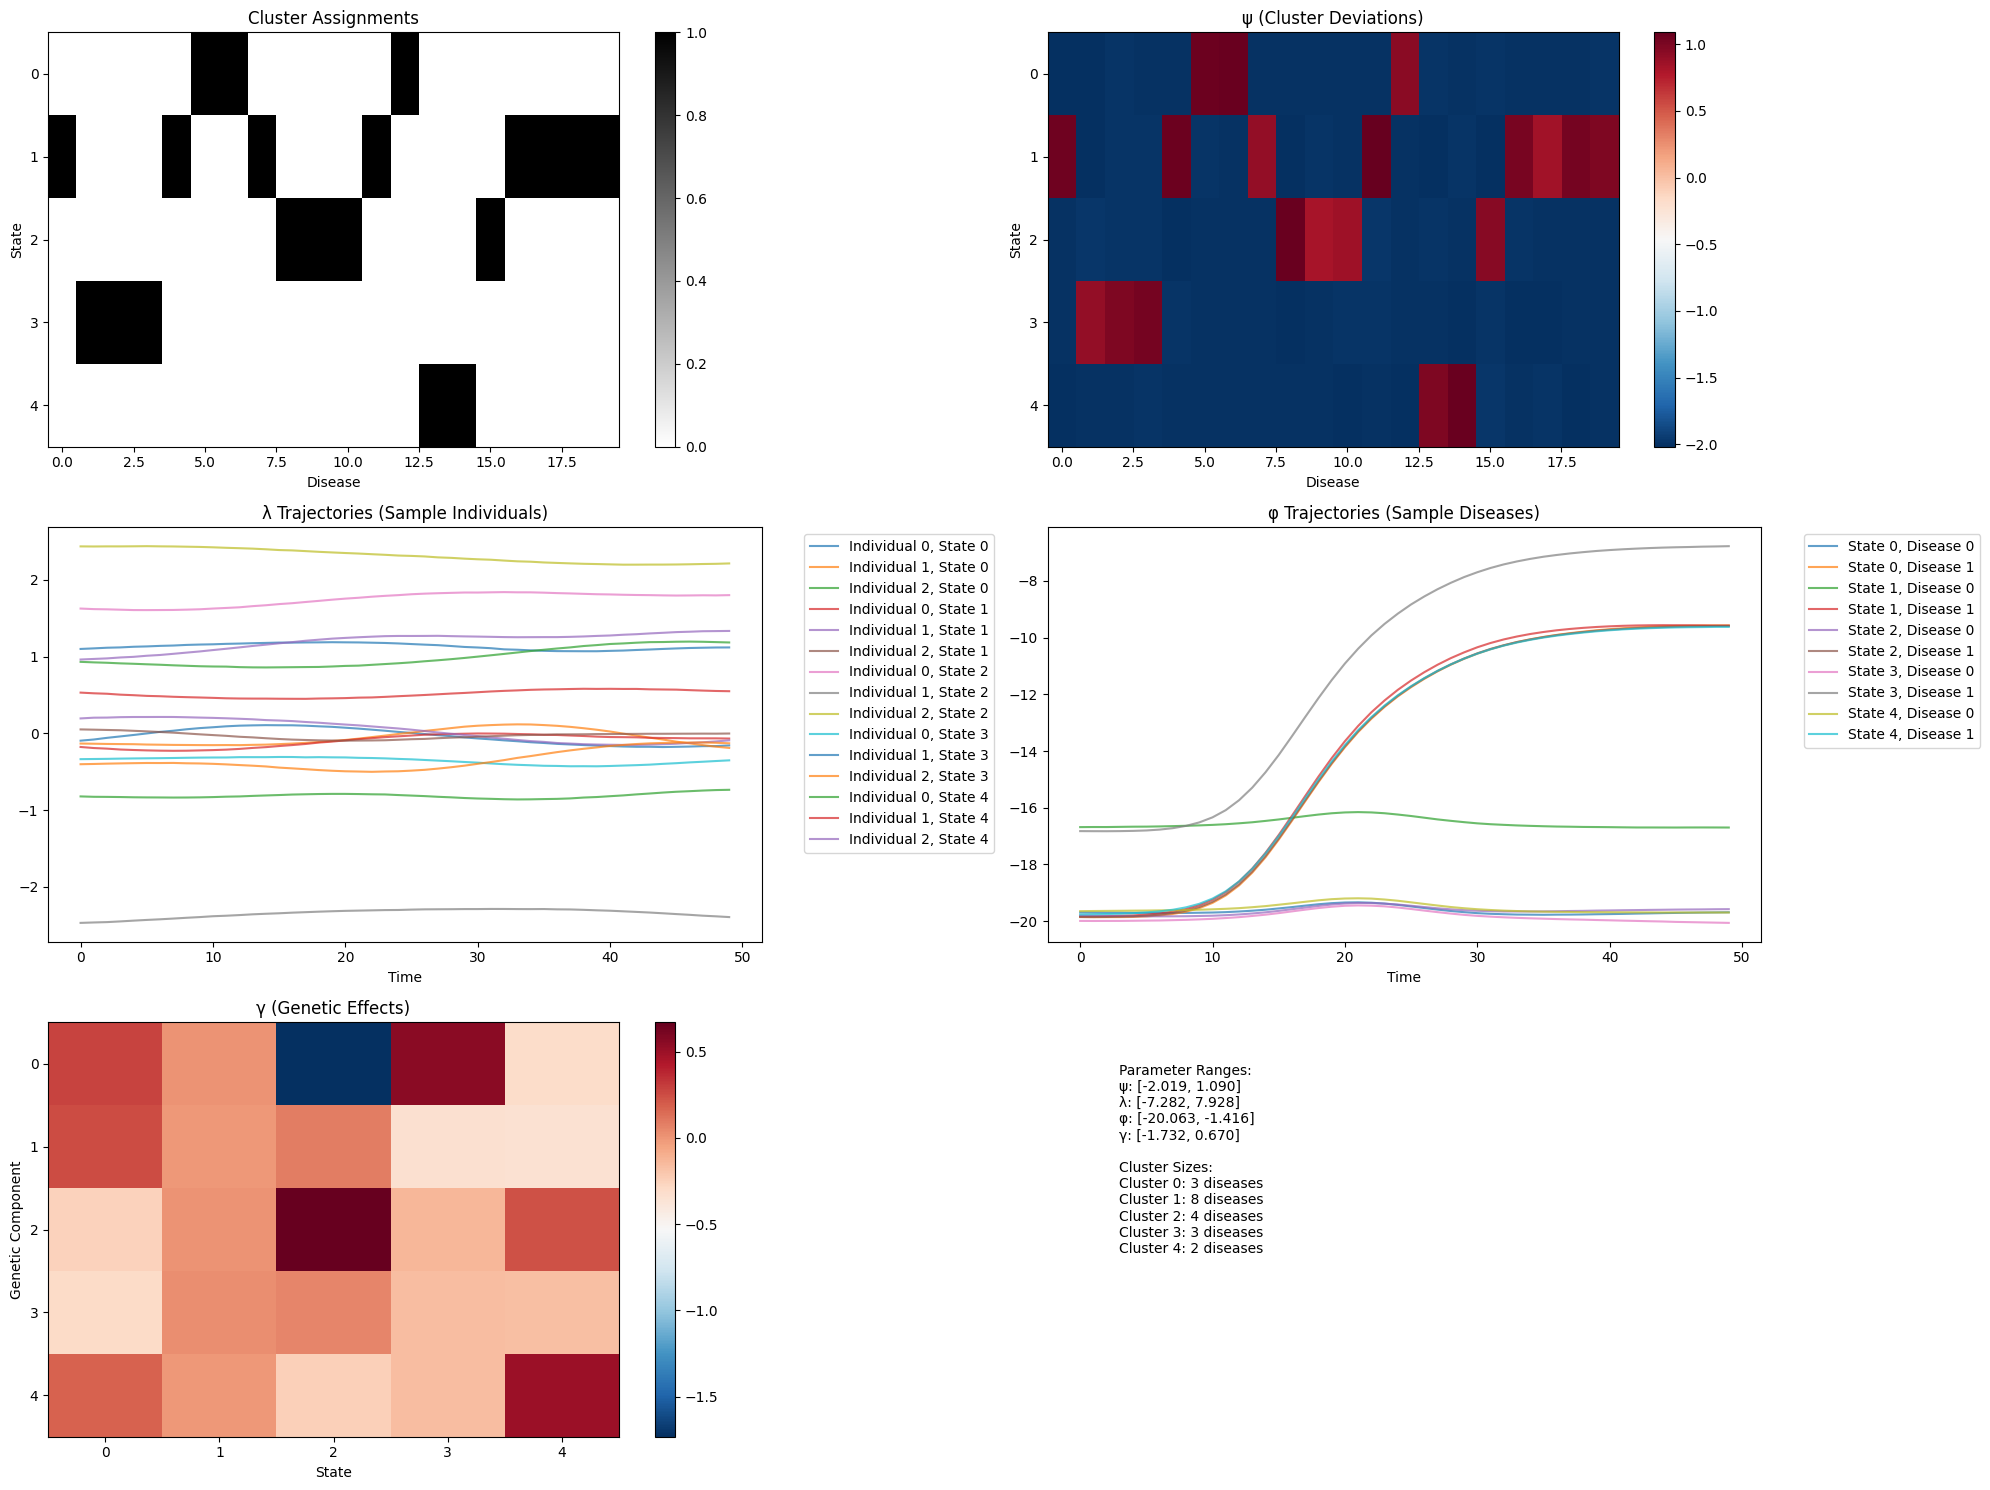

In [11]:
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=data['Y'].shape[0], 
    D=data['Y'].shape[1], 
    T=data['Y'].shape[2], 
    K=data['phi'].shape[0],  # number of clusters
    P=data['G'].shape[1],    # number of genetic features
    G=G_tensor,
    Y=Y_tensor,
    R=0,                     # Make sure R is provided
    W=1e-4,                # Make sure W is provided
    prevalence_t=prevalence_t,
    init_sd_scaler=1e-1,     # This matches your class definition
    genetic_scale=1,
    signature_references=None,
    healthy_reference=None,
    disease_names=None,
    flat_lambda=True,
    learn_kappa=True
)

model.visualize_initialization()



Calculating gamma for k=0:
Number of diseases in cluster: 4.0
Base value (first 5): tensor([-13.8155,  -8.8537, -13.8155, -11.3346, -13.8155])
Base value centered (first 5): tensor([-1.2710,  3.6909, -1.2710,  1.2099, -1.2710])
Base value centered mean: -3.94248957036325e-07
Gamma init for k=0 (first 5): tensor([ 0.4125, -0.2524, -0.0999, -0.1241, -0.1186])

Calculating gamma for k=1:
Number of diseases in cluster: 4.0
Base value (first 5): tensor([ -8.8537, -11.3346, -11.3346, -11.3346,  -8.8537])
Base value centered (first 5): tensor([ 0.4602, -2.0207, -2.0207, -2.0207,  0.4602])
Base value centered mean: 1.745605459291255e-06
Gamma init for k=1 (first 5): tensor([ 0.2134,  0.1943, -0.1943, -0.2261,  0.1326])

Calculating gamma for k=2:
Number of diseases in cluster: 4.0
Base value (first 5): tensor([ -6.3727, -11.3346,  -6.3727,  -8.8537, -11.3346])
Base value centered (first 5): tensor([ 2.7838, -2.1780,  2.7838,  0.3029, -2.1780])
Base value centered mean: 2.479553273815327e-08
G

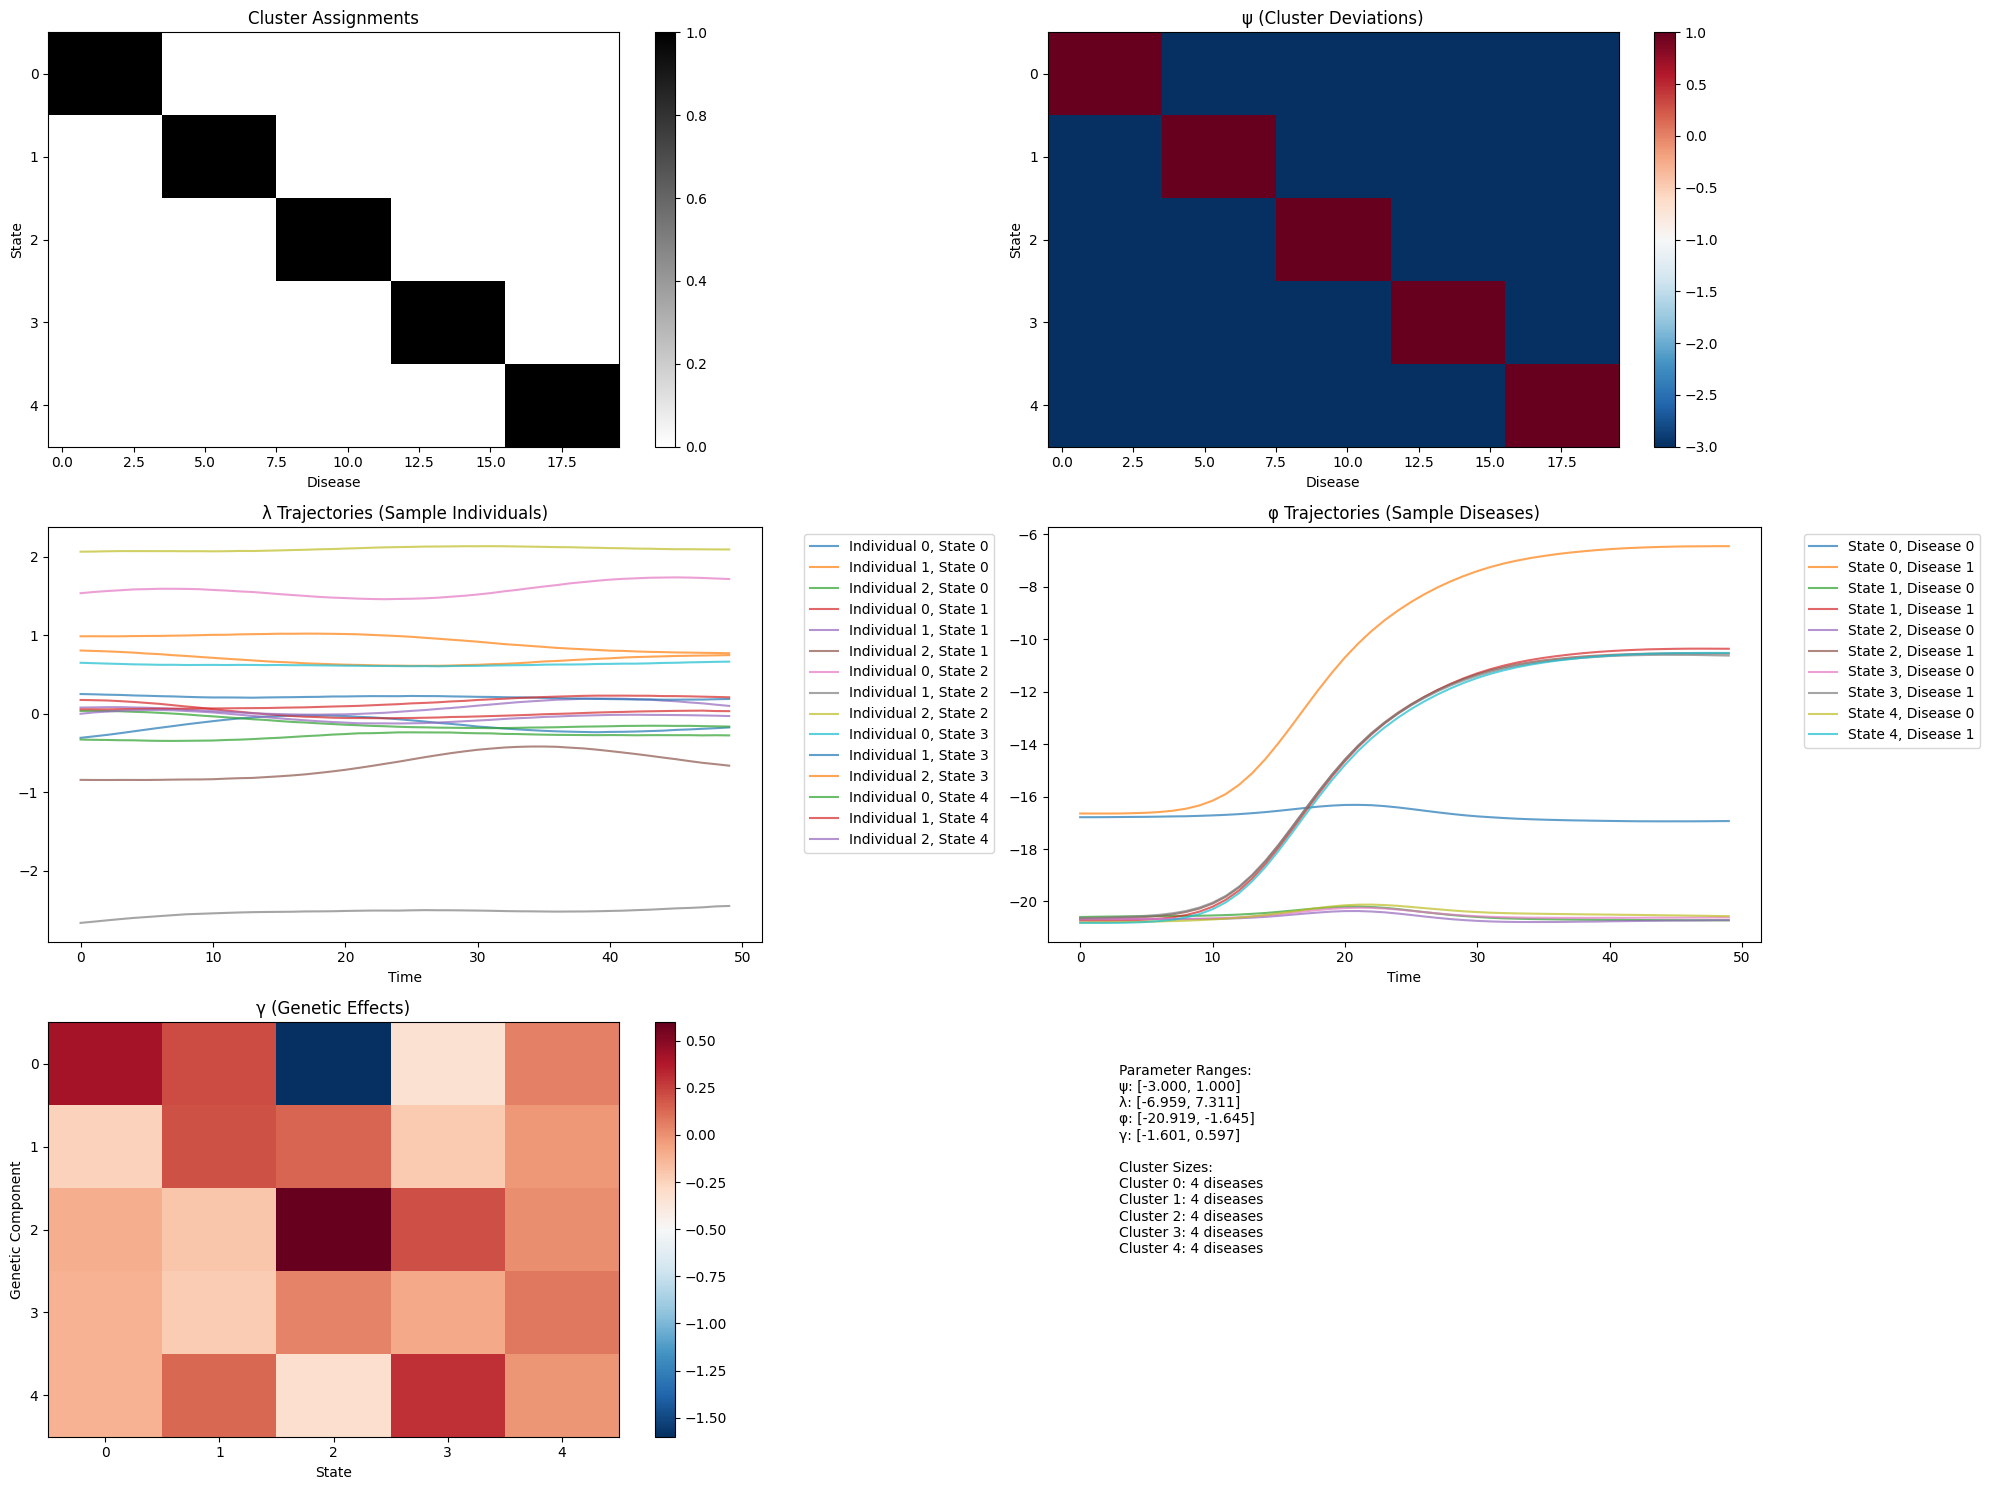

In [12]:

# Initialize with true psi
model.initialize_params(true_psi=true_psi)
model.clusters = data['clusters'] 

model.visualize_initialization()

In [13]:

K=5
# Store initial psi values
initial_psi = model.psi.detach().clone()

import cProfile
import pstats
from pstats import SortKey

# For the healthtoo version
profiler = cProfile.Profile()
profiler.enable()
history_new = model.fit(E_tensor, num_epochs=100, learning_rate=1e-1, lambda_reg=1e-2)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats(SortKey.CUMULATIVE)
stats.print_stats(20)

/Users/sarahurbut/aladynoulli2/pyScripts_forPublish/clust_huge_amp.py:238: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)



Epoch 0
Loss: 38.8349

Monitoring signature responses:

Disease 11 (signature 2, LR=62.16):
  Theta for diagnosed: 0.507 ± 0.277
  Theta for others: 0.276
  Proportion difference: 0.232

Disease 6 (signature 1, LR=60.12):
  Theta for diagnosed: 0.278 ± 0.114
  Theta for others: 0.183
  Proportion difference: 0.095

Disease 13 (signature 3, LR=59.17):
  Theta for diagnosed: 0.216 ± 0.092
  Theta for others: 0.160
  Proportion difference: 0.055

Disease 17 (signature 4, LR=56.29):
  Theta for diagnosed: 0.167 ± 0.067
  Theta for others: 0.125
  Proportion difference: 0.042

Disease 1 (signature 0, LR=55.03):
  Theta for diagnosed: 0.271 ± 0.115
  Theta for others: 0.197
  Proportion difference: 0.074

Epoch 1
Loss: 176.2553

Monitoring signature responses:

Disease 11 (signature 2, LR=62.22):
  Theta for diagnosed: 0.508 ± 0.277
  Theta for others: 0.276
  Proportion difference: 0.232

Disease 6 (signature 1, LR=60.08):
  Theta for diagnosed: 0.277 ± 0.112
  Theta for others: 0.183
  Pr

In [21]:
history_new[0]
    

[38.567283630371094,
 175.91188049316406,
 50.815956115722656,
 69.8587646484375,
 111.37569427490234,
 91.61507415771484,
 54.876407623291016,
 41.48872756958008,
 54.63877487182617,
 69.11747741699219,
 66.20284271240234,
 51.12487030029297,
 39.07109069824219,
 38.686683654785156,
 46.230674743652344,
 51.48394012451172,
 48.817142486572266,
 41.3089599609375,
 35.743385314941406,
 35.81332778930664,
 39.45938491821289,
 41.80901336669922,
 40.28535079956055,
 36.52508544921875,
 33.952999114990234,
 34.248512268066406,
 36.07848358154297,
 36.9130973815918,
 35.72234344482422,
 33.70249557495117,
 32.678218841552734,
 33.17937469482422,
 34.12476348876953,
 34.19719696044922,
 33.24092102050781,
 32.212886810302734,
 31.98686408996582,
 32.4478874206543,
 32.783992767333984,
 32.482872009277344,
 31.83417510986328,
 31.466114044189453,
 31.58884048461914,
 31.83188819885254,
 31.765480041503906,
 31.40199089050293,
 31.102134704589844,
 31.09286117553711,
 31.223445892333984,
 31.2

In [14]:
model.kappa

Parameter containing:
tensor([4.2502], requires_grad=True)

In [15]:
def plot_training_evolution(history_tuple):
    losses, gradient_history = history_tuple
    
    plt.figure(figsize=(15, 5))
    
    # Plot loss
    plt.subplot(1, 3, 1)
    plt.plot(losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Evolution')
    #plt.yscale('log')
    plt.legend()
    
    # Plot lambda gradients
    plt.subplot(1, 3, 2)
    lambda_norms = [torch.norm(g).item() for g in gradient_history['lambda_grad']]
    plt.plot(lambda_norms, label='Lambda gradients')
    #plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient norm')
    plt.title('Lambda Gradient Evolution')
    plt.legend()
    
    # Plot phi gradients
    plt.subplot(1, 3, 3)
    phi_norms = [torch.norm(g).item() for g in gradient_history['phi_grad']]
    plt.plot(phi_norms, label='Phi gradients')
    #plt.yscale('log')
    plt.xlabel('Epoch')
    plt.ylabel('Gradient norm')
    plt.title('Phi Gradient Evolution')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

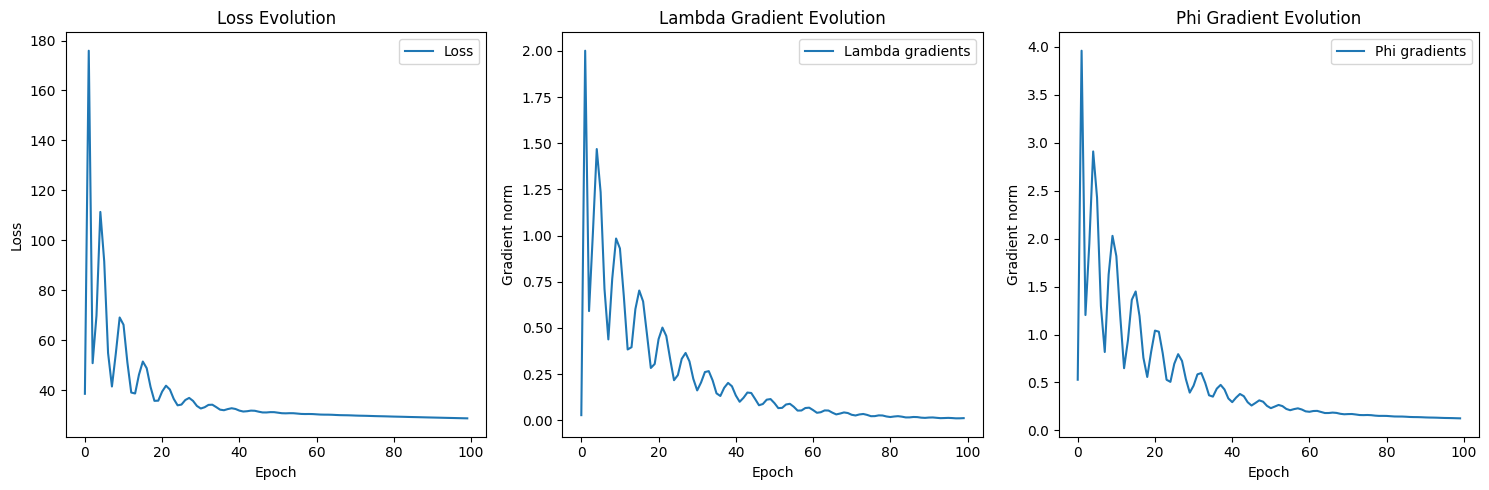

In [24]:
plot_training_evolution(history_new)

In [16]:
lambda_nans = [torch.isnan(g).any().item() for g in history_new[1]['lambda_grad']]
phi_nans = [torch.isnan(g).any().item() for g in history_new[1]['phi_grad']]

In [17]:
initial_psi


tensor([[ 1.,  1.,  1.,  1., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
         -3., -3., -3., -3., -3., -3.],
        [-3., -3., -3., -3.,  1.,  1.,  1.,  1., -3., -3., -3., -3., -3., -3.,
         -3., -3., -3., -3., -3., -3.],
        [-3., -3., -3., -3., -3., -3., -3., -3.,  1.,  1.,  1.,  1., -3., -3.,
         -3., -3., -3., -3., -3., -3.],
        [-3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,  1.,  1.,
          1.,  1., -3., -3., -3., -3.],
        [-3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
         -3., -3.,  1.,  1.,  1.,  1.]])

In [18]:
model.psi

Parameter containing:
tensor([[ 0.9223,  0.9995,  1.0662,  1.2495, -3.0144, -2.9316, -2.9585, -2.9894,
         -2.9464, -3.1607, -2.9189, -3.0841, -3.5834, -3.1885, -3.0043, -3.0472,
         -2.8363, -3.1650, -3.0468, -3.0293],
        [-2.9436, -2.9161, -2.9719, -3.0007,  0.9402,  1.3422,  1.1026,  0.6869,
         -2.9386, -3.0542, -3.0208, -2.9233, -3.1927, -2.9395, -2.9978, -3.1055,
         -2.8641, -3.1654, -2.9743, -3.0444],
        [-3.0002, -2.9661, -3.0185, -3.1214, -2.9869, -2.6760, -3.1262, -3.5615,
          0.4010,  1.1080,  0.9105,  1.2539, -3.1760, -3.0702, -2.8932, -2.6180,
         -3.0259, -3.4145, -3.0334, -2.9074],
        [-2.9135, -3.0322, -2.9259, -3.0944, -2.9910, -3.0116, -3.0867, -3.1397,
         -2.9461, -3.0518, -2.8724, -2.9855,  0.0909,  0.8216,  0.7896,  1.5924,
         -2.7760, -3.1396, -2.8856, -2.7753],
        [-2.9015, -3.0238, -2.9691, -3.0138, -2.9708, -2.7985, -3.1309, -3.0396,
         -3.0491, -3.0950, -2.8899, -2.9968, -3.1857, -2.9372, -3

In [19]:
model.kappa

Parameter containing:
tensor([4.2502], requires_grad=True)

In [20]:
# For plotting smoothed prevalences
def plot_smoothed_prevalences(model, data):
    # Data smoothed prevalence
    data_prev = data['Y'].mean(axis=0)  # Average across individuals
    
    # Model smoothed prevalence (using mu_d/logit_prev_t)
    model_prev = torch.sigmoid(model.logit_prev_t)  # Convert logits to probabilities
    
    plt.figure(figsize=(10, 6))
    
    # Plot for each disease
    for d in range(data_prev.shape[0]):
        plt.plot(data_prev[d], 'b-', alpha=0.3, label='Data' if d==0 else '')
        plt.plot(model_prev[:, d].detach().numpy(), 'r--', alpha=0.3, 
                label='Model' if d==0 else '')
    
    plt.xlabel('Time')
    plt.ylabel('Prevalence')
    plt.title('Smoothed Prevalences: Data vs Model')
    plt.legend()
    plt.yscale('log')  # Optional: use log scale if prevalences vary widely
    plt.grid(True)
    plt.show()

In [25]:
with torch.no_grad():
    pi_pred, theta, phi = model.forward()
    pi_pred = pi_pred.cpu().numpy()

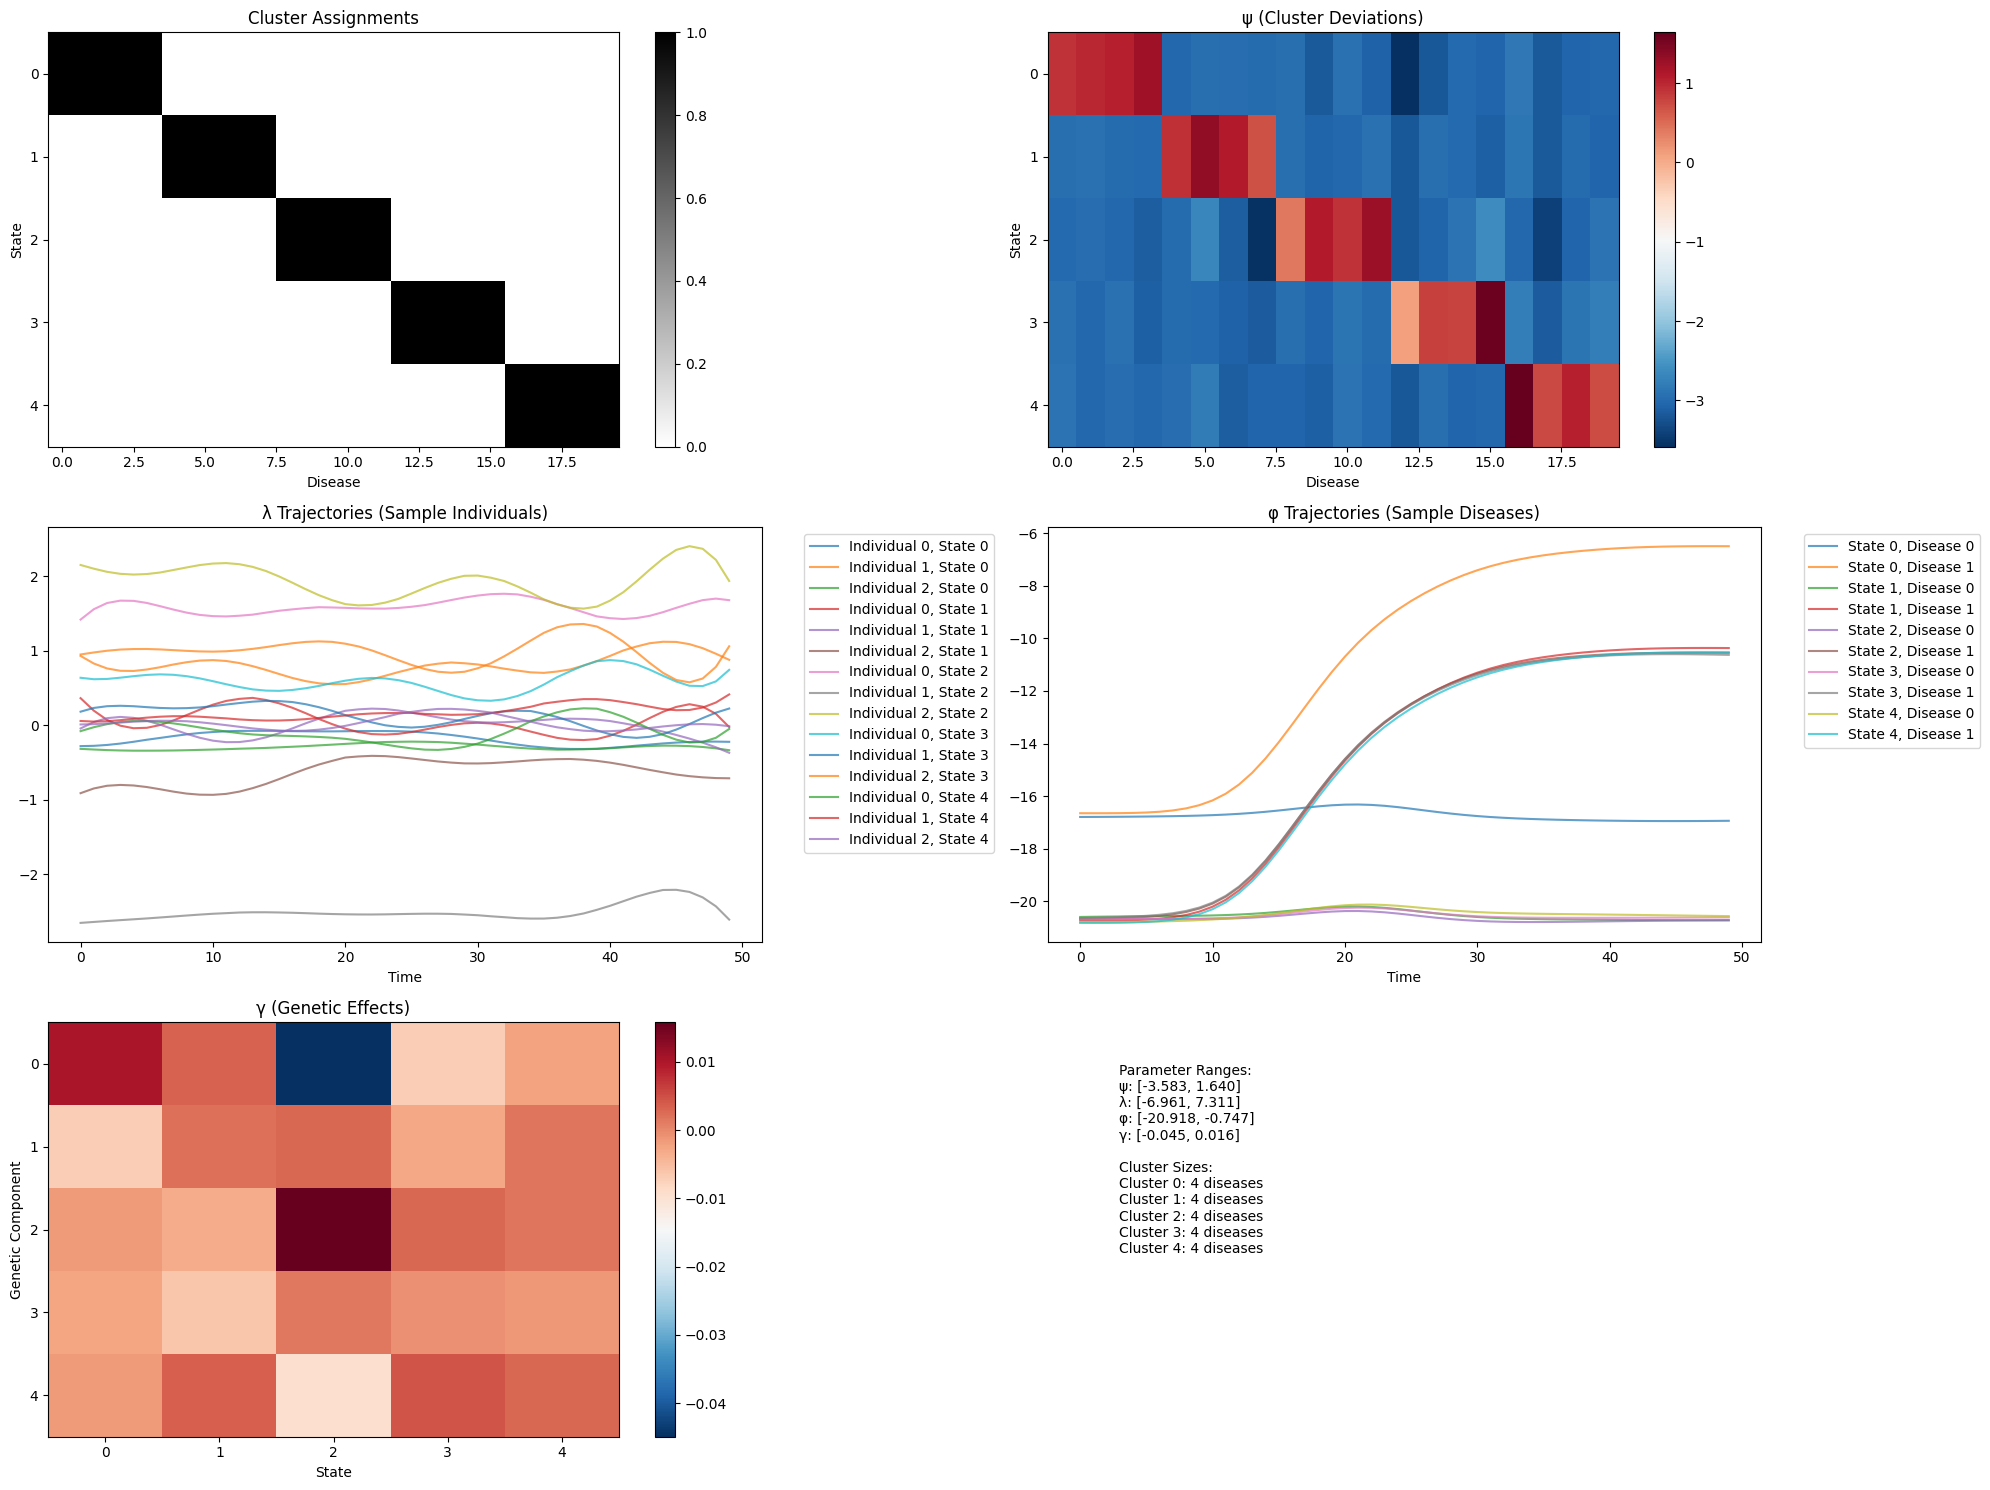

In [26]:
model.visualize_initialization()

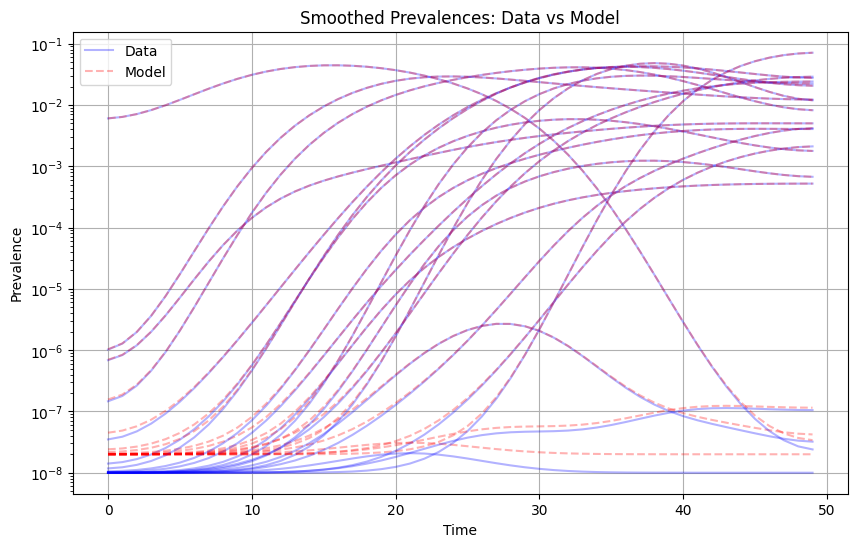

In [27]:
# For plotting smoothed prevalences
def plot_smoothed_prevalences(model, data):
    # Data smoothed prevalence
    data_prev = compute_smoothed_prevalence(data['Y'])  # Average across individuals
    
    # Model smoothed prevalence (using mu_d/logit_prev_t)
    model_prev = torch.sigmoid(model.logit_prev_t)  # Convert logits to probabilities
    
    plt.figure(figsize=(10, 6))
    
    # Plot for each disease
    for d in range(data_prev.shape[0]):
        plt.plot(data_prev[d], 'b-', alpha=0.3, label='Data' if d==0 else '')
        plt.plot(model_prev[d, :].detach().numpy(), 'r--', alpha=0.3, 
                label='Model' if d==0 else '')
    
    plt.xlabel('Time')
    plt.ylabel('Prevalence')
    plt.title('Smoothed Prevalences: Data vs Model')
    plt.legend()
    plt.yscale('log')  # Optional: use log scale if prevalences vary widely
    plt.grid(True)
    plt.show()

plot_smoothed_prevalences(model, data)

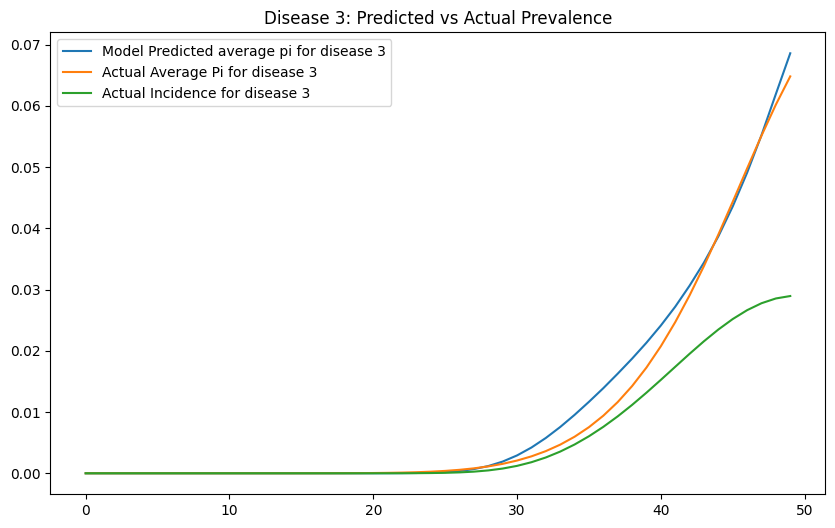

In [28]:
# Mean predicted probability for disease 3 over time
mean_pred_d3 = pi_pred[:, 3, :].mean(axis=0)  # Average across people

# Actual prevalence for disease 3 over time
real_prev_pi = data['pi'][:, 3, :].mean(axis=0)  # Average across people

#real_prev_d3 = data['Y'][:, 3, :].mean(axis=0)  # Average across people

real_prev_d3 = model.prevalence_t[3,:]  # Average across people

# Plot comparison
plt.figure(figsize=(10,6))
plt.plot(mean_pred_d3, label='Model Predicted average pi for disease 3')
plt.plot(real_prev_pi, label='Actual Average Pi for disease 3 ')
plt.plot(real_prev_d3, label='Actual Incidence for disease 3')
plt.title('Disease 3: Predicted vs Actual Prevalence')
plt.legend()
plt.show()

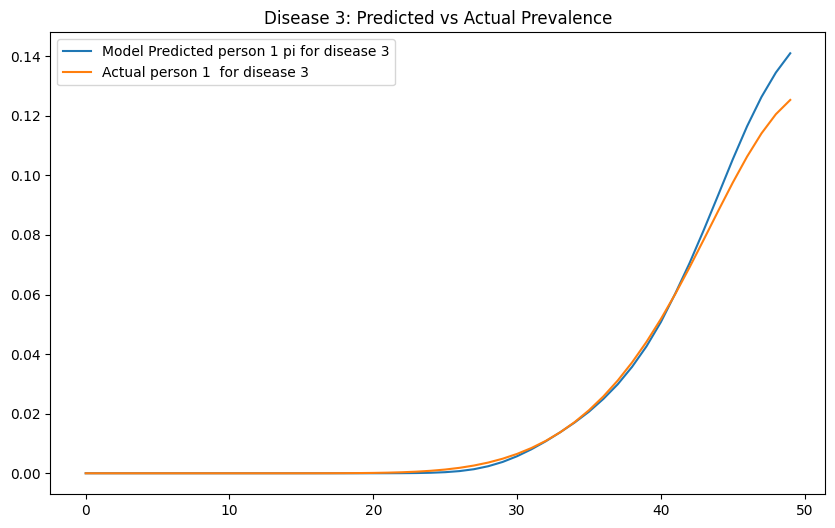

In [29]:
# Mean predicted probability for disease 3 over time
mean_pred_d3 = pi_pred[1, 3, :]  # Average across people

# Actual prevalence for disease 3 over time
real_prev_pi = data['pi'][1,3, :]  # Average across people

#real_prev_d3 = data['Y'][:, 3, :].mean(axis=0)  # Average across people

#real_prev_d3 = model.prevalence_t[3,:]  # Average across people

# Plot comparison
plt.figure(figsize=(10,6))
plt.plot(mean_pred_d3, label='Model Predicted person 1 pi for disease 3')
plt.plot(real_prev_pi, label='Actual person 1  for disease 3 ')
#plt.plot(real_prev_d3, label='Actual Incidence for disease 3')
plt.title('Disease 3: Predicted vs Actual Prevalence')
plt.legend()
plt.show()

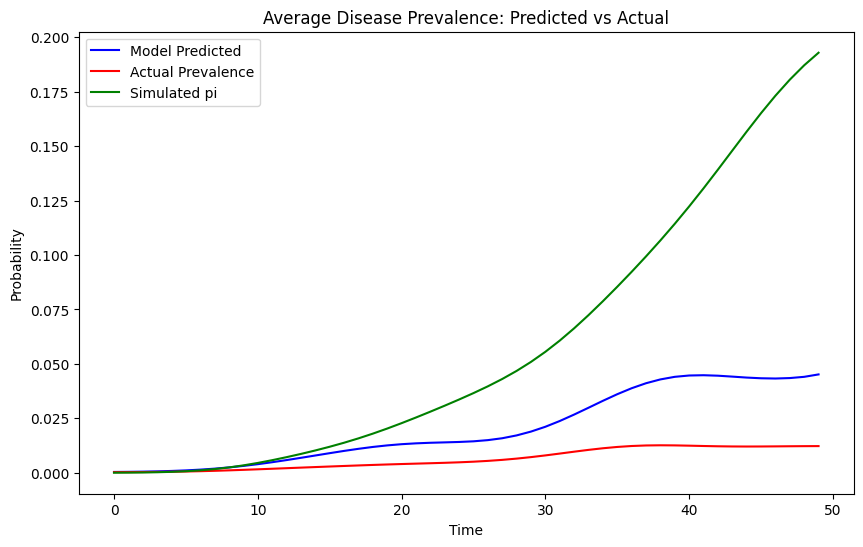

In [30]:
# Average over all diseases and all individuals
mean_pred_all = pi_pred.mean(axis=(0,1))  # Average across people and diseases
real_incidence_all = model.prevalence_t.mean(axis=0)  # Average across diseases
real_pi_all = data['pi'].mean(axis=(0,1)) # Average across diseases

plt.figure(figsize=(10,6))
plt.plot(mean_pred_all, 'b-', label='Model Predicted')
plt.plot(real_incidence_all, 'r-', label='Actual Prevalence') 
plt.plot(real_pi_all, 'g-', label='Simulated pi') 


plt.title('Average Disease Prevalence: Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [31]:
model.kappa

Parameter containing:
tensor([4.2502], requires_grad=True)

In [32]:
# 1. Get predictions and actual values
predicted = model.forward()
pi_pred = predicted[0] if isinstance(predicted, tuple) else predicted
pi_pred = pi_pred.cpu().detach().numpy()
Y = model.Y.cpu().detach().numpy()

# 2. Calculate marginal risks directly
# Assuming dimensions are: [N, D, T] for both Y and pi_pred
observed_risk = Y.mean(axis=0).flatten()  # average across individuals
predicted_risk = pi_pred.mean(axis=0).flatten()
#observed_risk=mu_dt_flat
# 3. Apply calibration
scale_factor = np.mean(observed_risk) / np.mean(predicted_risk)
calibrated_risk = predicted_risk * scale_factor
print(scale_factor)
print(np.mean(observed_risk))
print(np.mean(predicted_risk)) 
print(np.mean(calibrated_risk))

0.40535262
0.0083208
0.020527313
0.0083208


In [33]:
calibrated_risk.shape

(1000,)

In [34]:
scale_factor

0.40535262

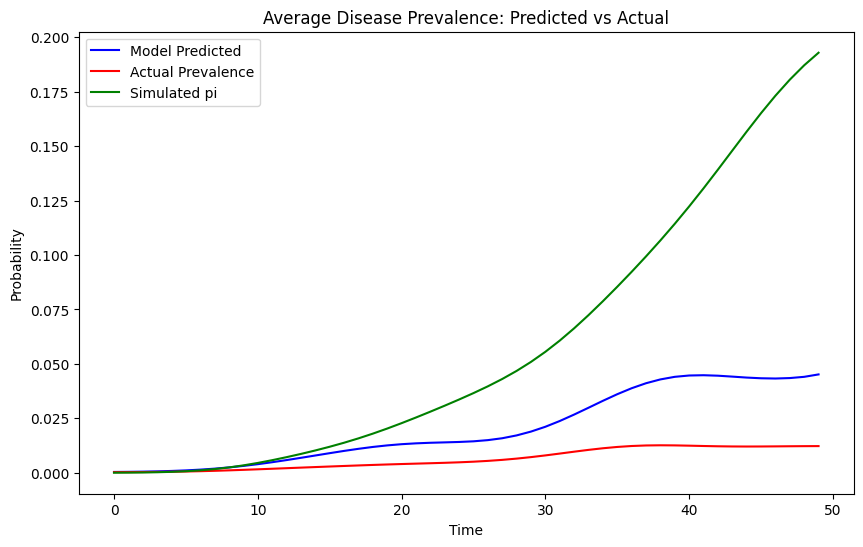

In [35]:
# Average over all diseases and all individuals
mean_pred_all = pi_pred.mean(axis=(0,1))
#mean_pred_all = pi_pred.mean(axis=(0,1))  # Average across people and diseases
real_incidence_all = model.prevalence_t.mean(axis=0)  # Average across diseases
#real_pi_all = calibrated_risk.mean(axis=(0,1)) # Average across diseases

plt.figure(figsize=(10,6))
plt.plot(mean_pred_all, 'b-', label='Model Predicted')
plt.plot(real_incidence_all, 'r-', label='Actual Prevalence') 
plt.plot(real_pi_all, 'g-', label='Simulated pi') 


plt.title('Average Disease Prevalence: Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

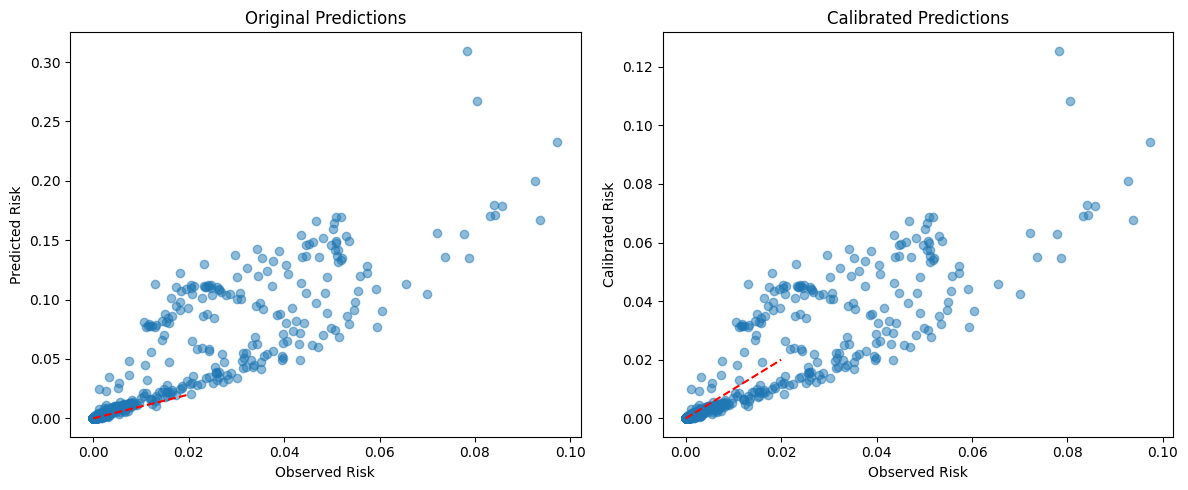

Mean observed risk: 0.008321
Mean predicted risk (original): 0.020527
Mean predicted risk (calibrated): 0.008321
Calibration scale factor: 0.405


In [36]:

# 4. Plot
plt.figure(figsize=(12, 5))

# Original predictions
plt.subplot(121)
plt.scatter(observed_risk, predicted_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Original Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Predicted Risk')

# Calibrated predictions
plt.subplot(122)
plt.scatter(observed_risk, calibrated_risk, alpha=0.5)
plt.plot([0, 0.02], [0, 0.02], 'r--')  # y=x line
plt.title('Calibrated Predictions')
plt.xlabel('Observed Risk')
plt.ylabel('Calibrated Risk')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Mean observed risk: {np.mean(observed_risk):.6f}")
print(f"Mean predicted risk (original): {np.mean(predicted_risk):.6f}")
print(f"Mean predicted risk (calibrated): {np.mean(calibrated_risk):.6f}")
print(f"Calibration scale factor: {scale_factor:.3f}")


In [37]:
def plot_hazard_comparison(Y, pi_pred, true_pi, calibration_factor):
    N, D, T = Y.shape
    
    # Create at_risk mask
    at_risk = np.ones_like(Y, dtype=bool)
    for n in range(N):
        for d in range(D):
            event_times = np.where(Y[n,d,:])[0]
            if len(event_times) > 0:
                at_risk[n,d,(event_times[0]+1):] = False
    
    # Apply calibration to predictions
    calibrated_pred = pi_pred * calibration_factor
    
    # Calculate means for at-risk only
    mean_pred = []
    mean_true = []
    mean_obs = []
    for t in range(T):
        mask_t = at_risk[:,:,t]
        if mask_t.sum() > 0:
            mean_pred.append(calibrated_pred[:,:,t][mask_t].mean())
            mean_true.append(true_pi[:,:,t][mask_t].mean())
            mean_obs.append(Y[:,:,t][mask_t].mean())
    
    plt.figure(figsize=(12,8))
    plt.plot(mean_pred, 'b-', label='Calibrated Model Prediction')
    plt.plot(mean_true, 'g--', label='True Hazard')
    plt.plot(mean_obs, 'r.', label='Observed Events')
    plt.title('Hazard Rates (At-Risk Individuals)')
    plt.xlabel('Time')
    plt.ylabel('Hazard')
    plt.legend()
    plt.show()

In [38]:
def calculate_calibration_factor(Y, pi_pred, true_pi):
    """
    Calculate calibration factor comparing predictions to true hazards
    Only using at-risk times
    """
    # Create at_risk mask
    N, D, T = Y.shape
    at_risk = np.ones_like(Y, dtype=bool)
    for n in range(N):
        for d in range(D):
            event_times = np.where(Y[n,d,:])[0]
            if len(event_times) > 0:
                at_risk[n,d,(event_times[0]+1):] = False
    
    # Get valid predictions and true values
    valid_pred = pi_pred[at_risk]
    valid_true = true_pi[at_risk]
    
    # Calculate calibration factor
    calibration_factor = valid_true.mean() / valid_pred.mean()
    
    print(f"Mean predicted: {valid_pred.mean():.6f}")
    print(f"Mean true: {valid_true.mean():.6f}")
    print(f"Calibration factor: {calibration_factor:.4f}")
    
    return calibration_factor

In [45]:
calculate_calibration_factor(Y, pi_pred, data['pi'])

Mean predicted: 0.009394
Mean true: 0.009513
Calibration factor: 1.0127


np.float64(1.0127264350805427)

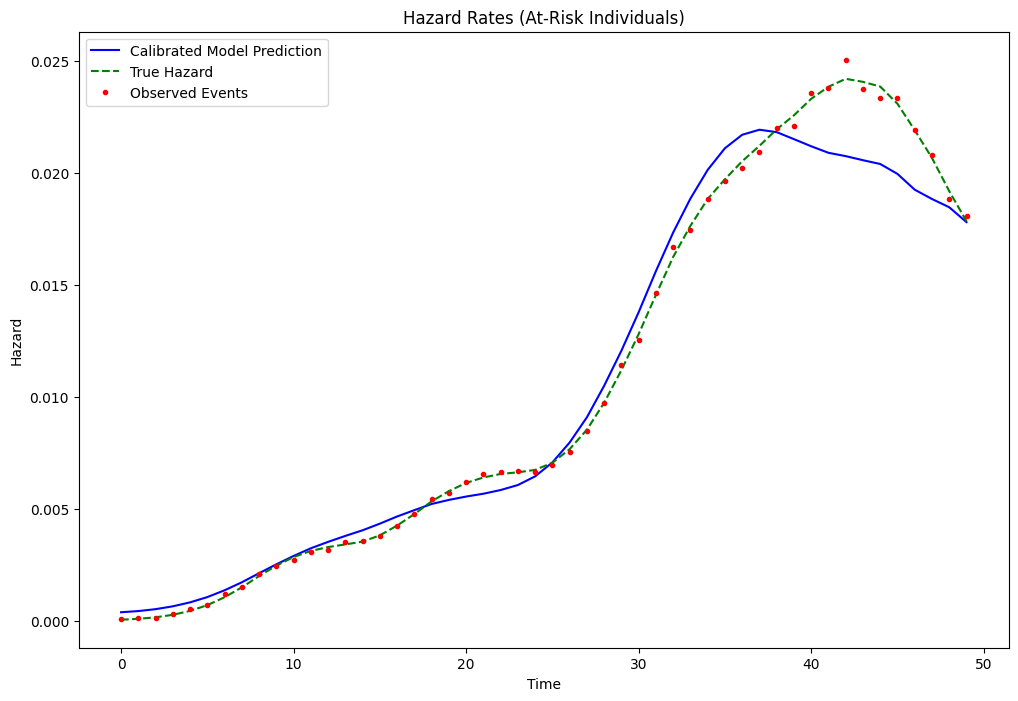

In [46]:
plot_hazard_comparison(data['Y'], pi_pred, data['pi'],1)

In [39]:
def calculate_fair_calibration_factor(Y, pi_pred):
    N, D, T = Y.shape
    
    # Create at_risk mask
    at_risk = np.ones_like(Y, dtype=bool)
    for n in range(N):
        for d in range(D):
            event_times = np.where(Y[n,d,:])[0]
            if len(event_times) > 0:
                at_risk[n,d,(event_times[0]+1):] = False
    
    # Calculate ratio of observed events to predictions for at-risk individuals
    total_observed = 0
    total_predicted = 0
    
    for t in range(T):
        mask_t = at_risk[:,:,t]
        if mask_t.sum() > 0:
            total_observed += Y[:,:,t][mask_t].sum()
            total_predicted += pi_pred[:,:,t][mask_t].sum()
    
    return total_observed / total_predicted if total_predicted > 0 else 1.0

cf=calculate_fair_calibration_factor(Y, pi_pred)

In [40]:
cf

1.0134499431619852

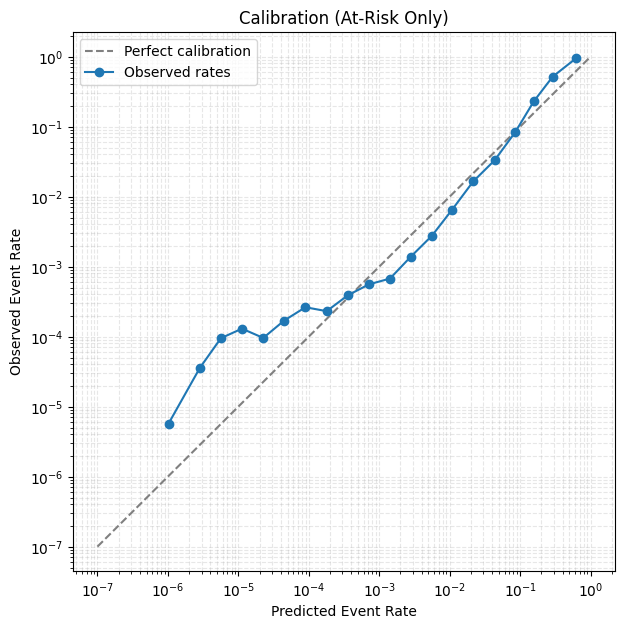

MSE: 8.21e-03
Mean Predicted: 9.38e-03
Mean Observed: 9.51e-03
N total: 8,749,563


([1.0219721e-06,
  2.8500494e-06,
  5.65462e-06,
  1.1247197e-05,
  2.2589138e-05,
  4.4798875e-05,
  8.9662564e-05,
  0.00017946285,
  0.00035872625,
  0.00071565993,
  0.0014199851,
  0.0027815322,
  0.0055897813,
  0.010828617,
  0.02153656,
  0.04336899,
  0.08502793,
  0.15656587,
  0.28925186,
  0.6289828],
 [5.7250756230443665e-06,
  3.590001333429067e-05,
  9.49387117871685e-05,
  0.00012995853703818305,
  9.579133909449816e-05,
  0.00016991465056398594,
  0.00026281993847624167,
  0.00023102812767454437,
  0.0003900189437772692,
  0.0005585032113934655,
  0.000674853335753497,
  0.0013752852555687946,
  0.002760456780614965,
  0.006511817097459219,
  0.01645358824069339,
  0.033023796733040914,
  0.08324322083377958,
  0.2303998875755352,
  0.5166841552990556,
  0.9559585492227979],
 [3842744,
  194986,
  189596,
  161590,
  146151,
  153018,
  167415,
  190453,
  233322,
  311547,
  429723,
  495170,
  540128,
  545777,
  381315,
  338786,
  289453,
  128086,
  9530,
  772])

In [41]:
# Calibration plot
from clust_huge_amp_w_warp import plot_calibration_at_risk
plot_calibration_at_risk(pi_pred, data['Y'],use_log_scale=True)


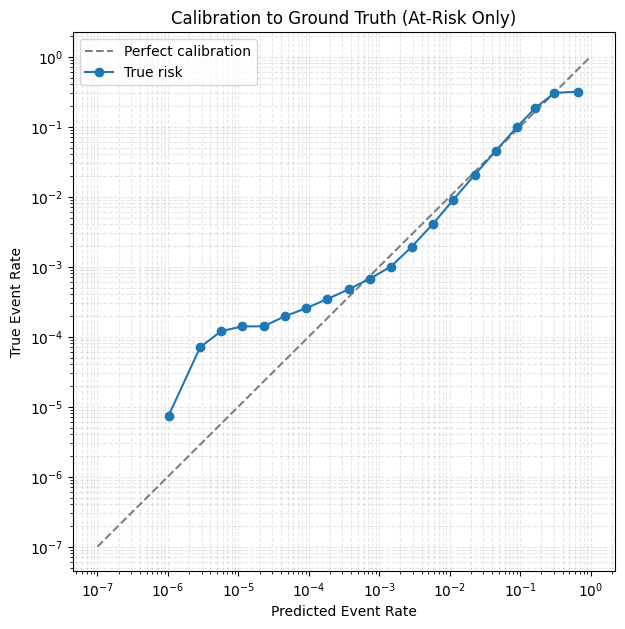

MSE: 5.70e-03
Mean Predicted: 9.39e-03
Mean True: 9.51e-03
N total: 8,749,563


([np.float32(1.0223168e-06),
  np.float32(2.8630873e-06),
  np.float32(5.6846843e-06),
  np.float32(1.13841625e-05),
  np.float32(2.292729e-05),
  np.float32(4.5582456e-05),
  np.float32(9.139727e-05),
  np.float32(0.00018336218),
  np.float32(0.00036796342),
  np.float32(0.0007354409),
  np.float32(0.0014614967),
  np.float32(0.0028774315),
  np.float32(0.0058001042),
  np.float32(0.011233682),
  np.float32(0.02256532),
  np.float32(0.04542197),
  np.float32(0.08899129),
  np.float32(0.16372822),
  np.float32(0.30677485),
  np.float32(0.65298504)],
 [np.float64(7.415973445148507e-06),
  np.float64(7.023299990805937e-05),
  np.float64(0.00011960481032888445),
  np.float64(0.00013981734356819056),
  np.float64(0.00014055276912096763),
  np.float64(0.00019492813654580128),
  np.float64(0.0002542571673830578),
  np.float64(0.00034456338512557974),
  np.float64(0.0004735219400534184),
  np.float64(0.0006722989791865243),
  np.float64(0.001002544212171623),
  np.float64(0.001914120873498421

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def plot_true_calibration(pi_pred, true_pi, Y, n_bins=20, use_log_scale=False, min_bin_count=50):
    """
    Plots calibration curve: predicted pi vs. true pi (ground truth), at at-risk times.
    """
    # Ensure numpy arrays
    if hasattr(pi_pred, 'detach'):
        pi_pred = pi_pred.detach().cpu().numpy()
    if hasattr(true_pi, 'detach'):
        true_pi = true_pi.detach().cpu().numpy()
    if hasattr(Y, 'detach'):
        Y = Y.detach().cpu().numpy()
    N, D, T = Y.shape

    # At-risk mask
    at_risk = np.ones_like(Y, dtype=bool)
    for n in range(N):
        for d in range(D):
            event_times = np.where(Y[n, d, :])[0]
            if len(event_times) > 0:
                at_risk[n, d, (event_times[0]+1):] = False

    pred = pi_pred[at_risk]
    truth = true_pi[at_risk]

    # Bin by predicted probability
    if use_log_scale:
        bin_edges = np.logspace(np.log10(max(1e-7, pred.min())), np.log10(pred.max()), n_bins + 1)
    else:
        bin_edges = np.linspace(pred.min(), pred.max(), n_bins + 1)

    bin_means = []
    truth_means = []
    counts = []

    for i in range(n_bins):
        mask = (pred >= bin_edges[i]) & (pred < bin_edges[i + 1])
        if np.sum(mask) >= min_bin_count:
            bin_means.append(np.mean(pred[mask]))
            truth_means.append(np.mean(truth[mask]))
            counts.append(np.sum(mask))

    # Plot
    plt.figure(figsize=(7, 7))
    if use_log_scale:
        plt.xscale('log')
        plt.yscale('log')
        plt.plot([1e-7, 1], [1e-7, 1], '--', color='gray', label='Perfect calibration')
    else:
        plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfect calibration')

    plt.plot(bin_means, truth_means, 'o-', label='True risk')
    plt.xlabel('Predicted Event Rate')
    plt.ylabel('True Event Rate')
    plt.title('Calibration to Ground Truth (At-Risk Only)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', alpha=0.3)
    plt.show()

    # Print summary stats
    mse = np.mean((np.array(bin_means) - np.array(truth_means))**2)
    print(f'MSE: {mse:.2e}')
    print(f'Mean Predicted: {np.mean(pred):.2e}')
    print(f'Mean True: {np.mean(truth):.2e}')
    print(f'N total: {len(pred):,}')

    return bin_means, truth_means, counts

# Example usage:
plot_true_calibration(pi_pred, data['pi'], data['Y'], n_bins=20, use_log_scale=True)